In [27]:
!pip install sklearn

In [84]:
import neurolab as nl
import numpy as np
import numpy as np
import pylab as pl
import csv
import math

In [242]:
adata = []

adata = np.genfromtxt('C:\\F16 Material\\AI\\project\\data.csv', skip_header= True, dtype=float, delimiter=',', usecols=(6,7,8,9,10,11,24))

xdata_zeros = []
ydata_zeros = []

xdata_ones = []
ydata_ones = []

for i in range(0, len(adata)):
    temp = []
    yval = int(adata[i][len(adata[i]) - 1])
    if yval ==1:
        for j in range(0, len(adata[i]) - 1):
            temp.append(int(adata[i][j]))
        xdata_ones.append(temp)
        ydata_ones.append([yval])
    else:
        for j in range(0, len(adata[i]) - 1):
            temp.append(int(adata[i][j]))
        xdata_zeros.append(temp)
        ydata_zeros.append([yval])

nzeros = len(xdata_zeros)
nones = len(xdata_ones)


zeros_div = int(math.floor(nzeros * 0.75 - 1))
ones_div = int(math.floor(nones * 0.75 - 1))

train_inputs = np.array(xdata_zeros[0:zeros_div] + xdata_ones[0:ones_div])
train_outputs = np.array(ydata_zeros[0:zeros_div] + ydata_ones[0:ones_div])
test_inputs = np.array(xdata_zeros[zeros_div:nzeros]+xdata_ones[ones_div:nones])
test_outputs = np.array(ydata_zeros[zeros_div:nzeros]+ydata_ones[ones_div:nones])



23364
6635


In [411]:
lvq_op = list()
left, right = 0,0
for i in test_outputs:
    if i[0] == 0:
        lvq_op.append([1,0])
        left+=1
    else:
        lvq_op.append([0,1])
        right+=1
        
train_lvq = list()
left, right = 0,0
for i in train_outputs:
    if i[0] == 0:
        train_lvq.append([1,0])
        left+=1
    else:
        train_lvq.append([0,1])
        right+=1
    

In [363]:
len(train_lvq)

22497

In [337]:
net = nl.net.newc([[-7,7]]*6, 2)
error = net.train(train_inputs, epochs=10, show = 20)
op = net.sim(test_inputs)

AssertionError: 

In [413]:
net_l = nl.net.newlvq([[-7,7]]*6, 10, [0.778859403476019,1-0.778859403476019])
error_l = net_l.train(train_inputs, train_lvq, epochs=30, goal=-1)
op = net_l.sim(test_inputs)


The maximum number of train epochs is reached


In [405]:
count = 0
for i in op:
    if i[1] == 0:
        count+=1
# len(op)
count

7318

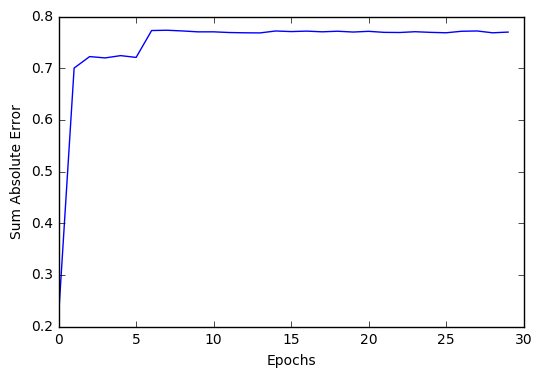

In [414]:
fig = pl.plot(error_l)
pl.xlabel('Epochs')
pl.ylabel('Sum Absolute Error')
pl.show()

In [266]:

predicted_op = list()
count = 0
for i in op:
    if i[1] == 1:
        predicted_op.append(0)
    else:
        predicted_op.append(1)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [239]:
expected_op = list()
for i in test_outputs:
    expected_op.append(i[0])    

In [329]:
from sklearn.metrics import classification_report
len(predicted_op), len(expected_op)

(0, 7502)

In [356]:
print(classification_report(expected_op, predicted_op))

ValueError: Found arrays with inconsistent numbers of samples: [   0 7502]

In [415]:
lvq_pred = list()
for i in op:
    if i[0] == 1:
        lvq_pred.append(0)
    else:
        lvq_pred.append(1)
        
        
    

In [416]:
lvq_exp = list()
for i in lvq_op:
    if i[0] == 1:
        lvq_exp.append(0)
    else:
        lvq_exp.append(1)
    

In [409]:
len(lvq_exp), len(lvq_pred)

(7502, 7502)

In [417]:
print classification_report(lvq_exp, lvq_pred)

             precision    recall  f1-score   support

          0       0.76      0.02      0.03      5842
          1       0.22      0.98      0.36      1660

avg / total       0.64      0.23      0.11      7502

